In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

데이터 불러오기

In [2]:
# 같은 위치에 폴더 생성 후 데이터 저장
mat = pd.read_csv("./caliper_xapi/train-student-mat.csv")
por = pd.read_csv("./caliper_xapi/train-student-por.csv")

In [3]:
#과목별 평균을 기준으로 새로운 G1_X 열 만들기
por['G1_X'] = por['G1'] - por['G1'].mean()
mat['G1_X'] = mat['G1'] - mat['G1'].mean()


#열 이름 변경
#por.rename(columns={'G1': 'G1_por'}, inplace=True)
#mat.rename(columns={'G1': 'G1_mat'}, inplace=True)

#데이터 합치기
df = pd.concat([por, mat])

상관관계 분석

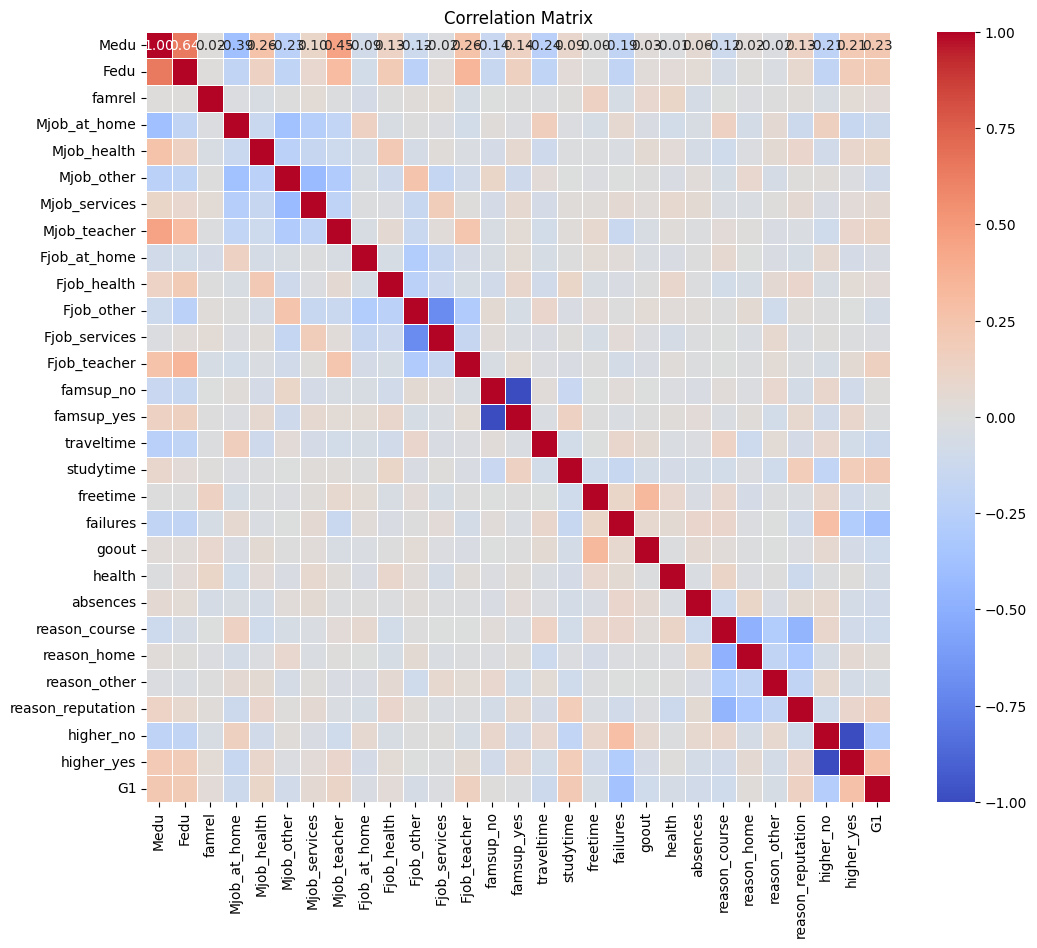

In [4]:
# 원본 데이터프레임을 복사하여 사용
df_encoded = df.copy()

# object 타입의 열을 원핫인코딩
df_encoded = pd.get_dummies(df_encoded, columns=['Mjob', 'Fjob', 'reason', 'famsup', 'higher'])

# 상관관계 분석에 필요한 열만 선택
df_subset = df_encoded[['Medu', 'Fedu', 'famrel', 
                        'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 
                        'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 
                        'famsup_no', 'famsup_yes', 
                        'traveltime', 'studytime', 'freetime',
                        'failures', 'goout','health', 'absences',
                       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
                        'higher_no', 'higher_yes','G1', 
                       ]]

# 상관관계 행렬 계산
corr = df_subset.corr()

# 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [5]:
# 상관관계 계산
correlation_values = df_subset.corr()

# 'G1' 열과의 상관관계를 기준으로 정렬
g1_correlation = correlation_values['G1'].sort_values(ascending=False)

g1_correlation

G1                   1.000000
higher_yes           0.271476
Medu                 0.226101
studytime            0.211314
Fedu                 0.195898
Fjob_teacher         0.153033
reason_reputation    0.138143
Mjob_teacher         0.112105
Mjob_health          0.108038
Mjob_services        0.055008
Fjob_health          0.038436
famrel               0.036947
reason_home          0.017047
famsup_no            0.013655
famsup_yes          -0.013655
Fjob_services       -0.020304
Fjob_at_home        -0.032949
freetime            -0.051985
reason_other        -0.053865
Fjob_other          -0.055477
health              -0.060478
Mjob_other          -0.086086
absences            -0.092425
reason_course       -0.101062
goout               -0.101163
traveltime          -0.121053
Mjob_at_home        -0.121758
higher_no           -0.271476
failures            -0.374175
Name: G1, dtype: float64

### 데이터 전처리

1. 이상치 확인

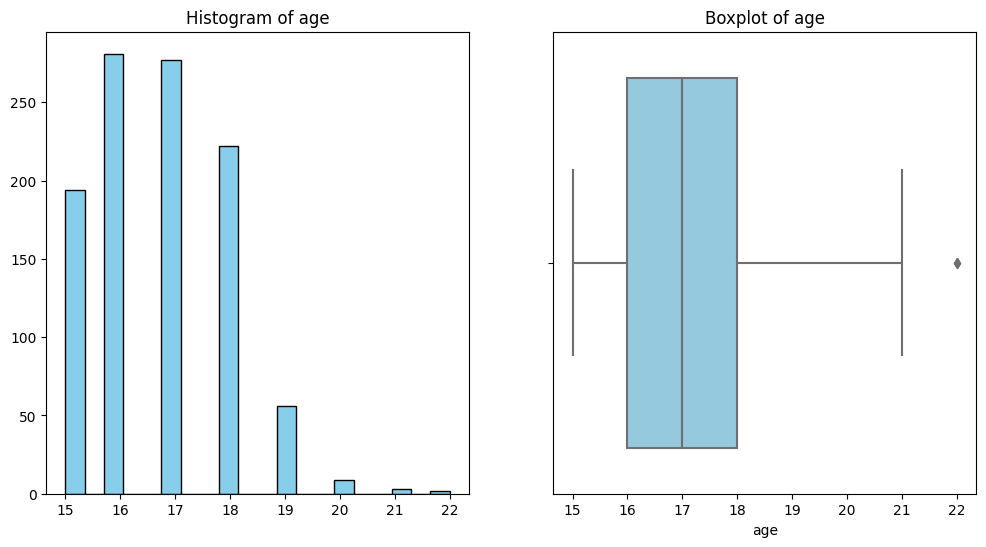

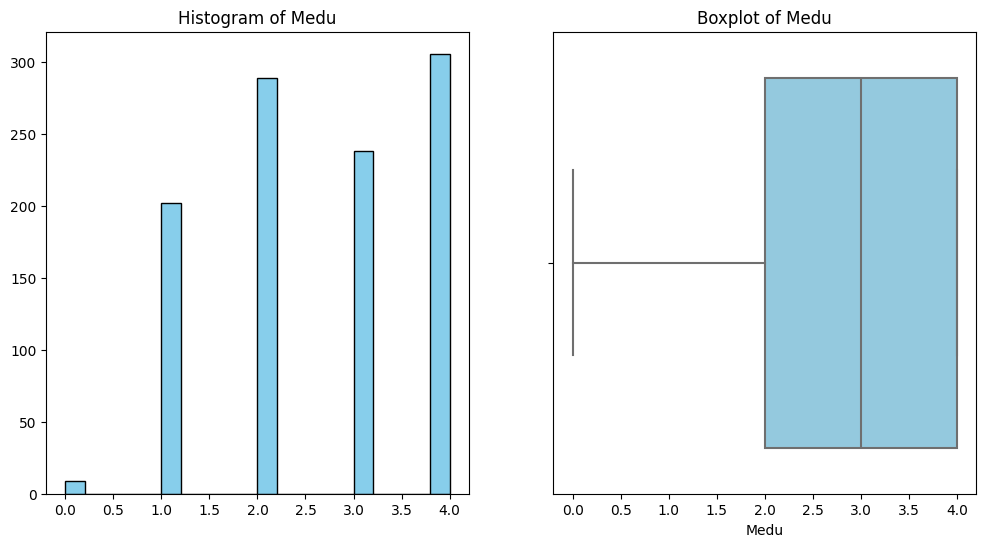

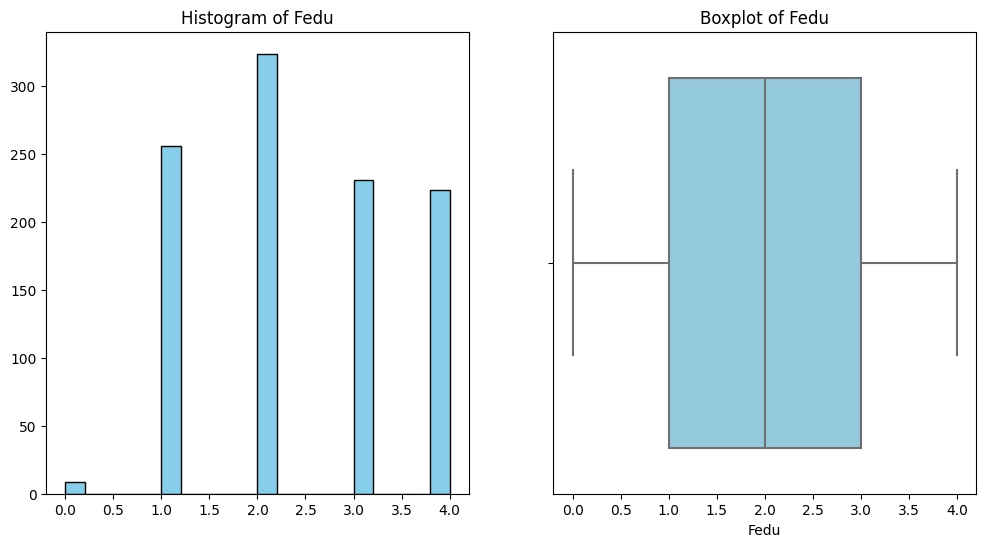

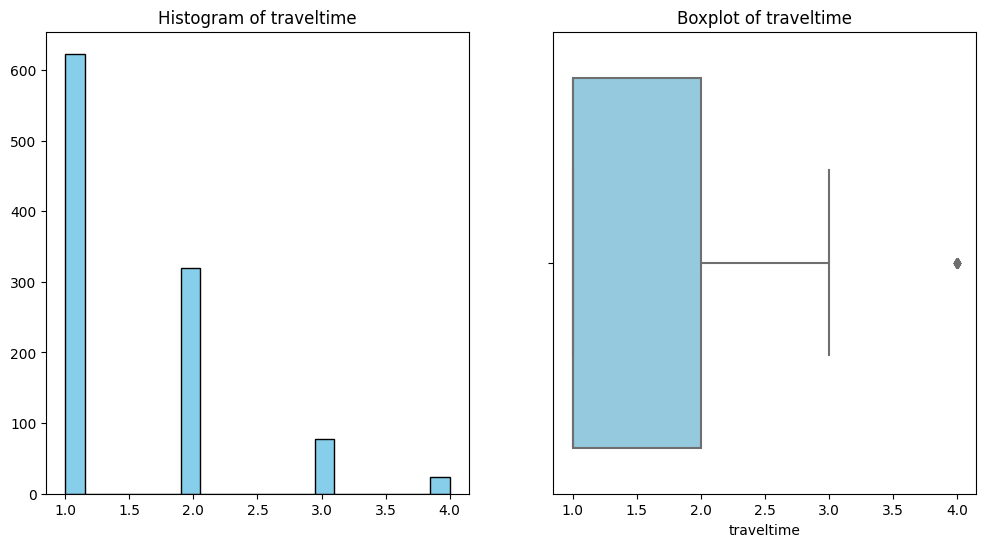

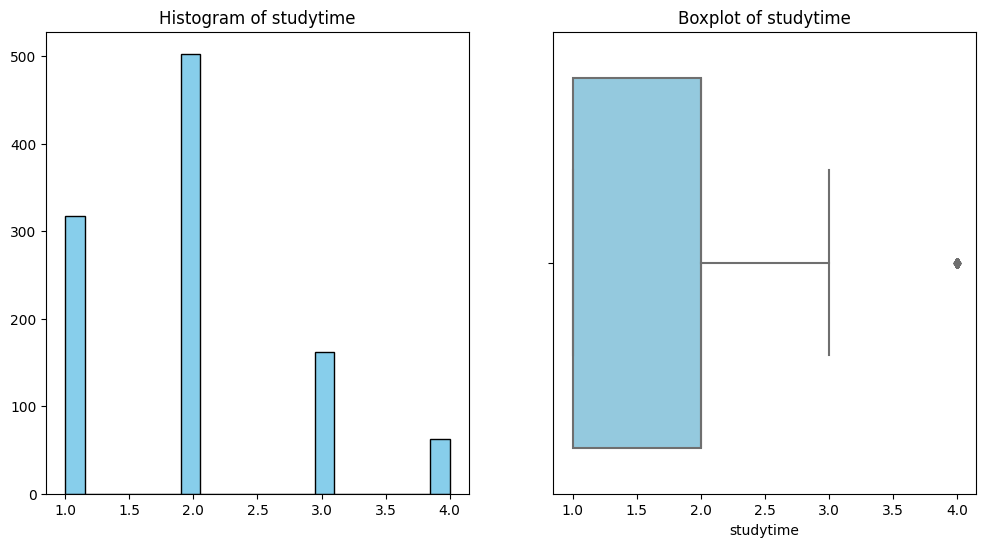

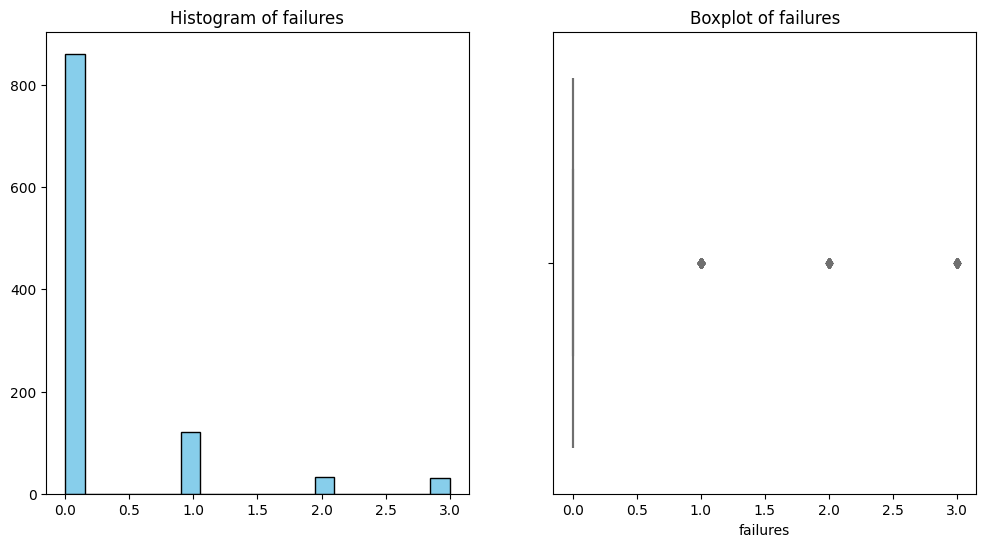

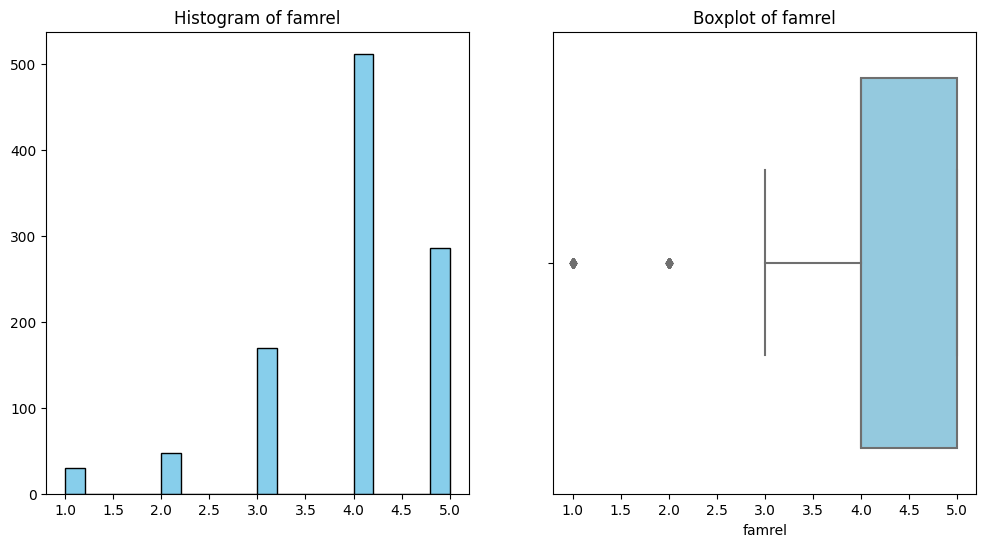

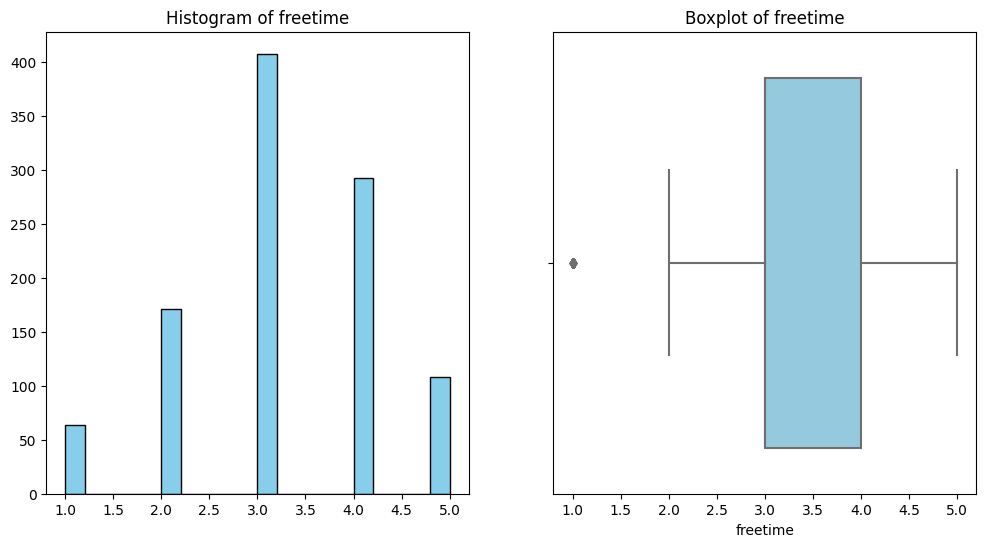

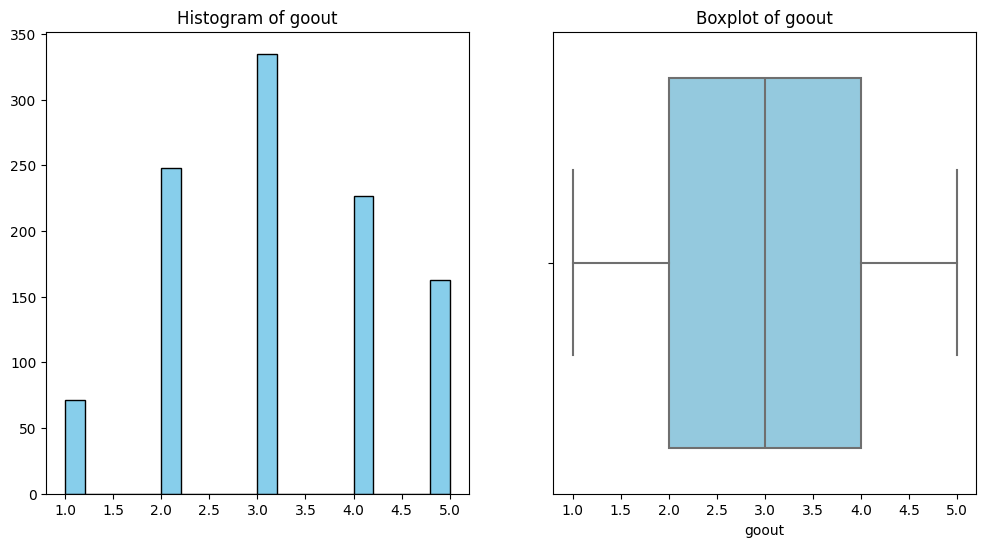

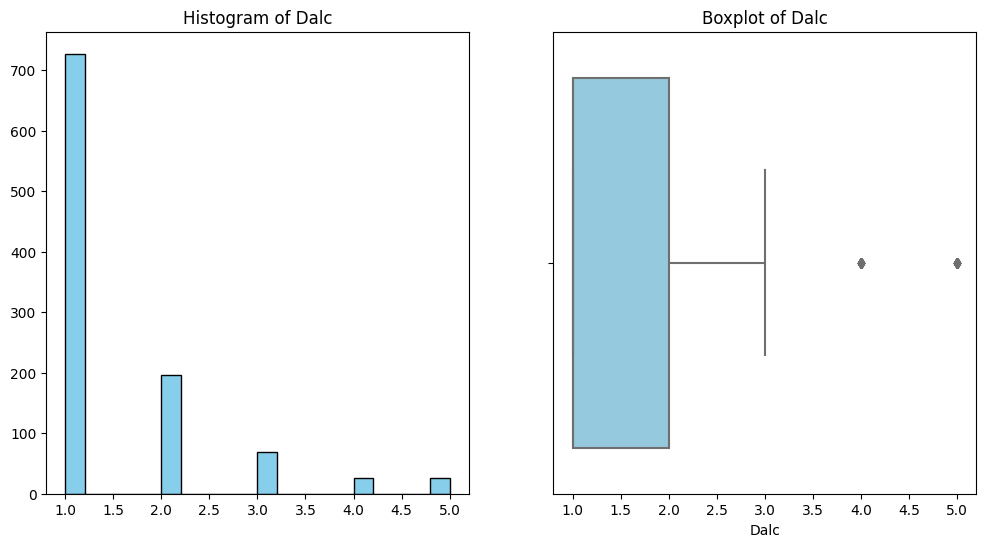

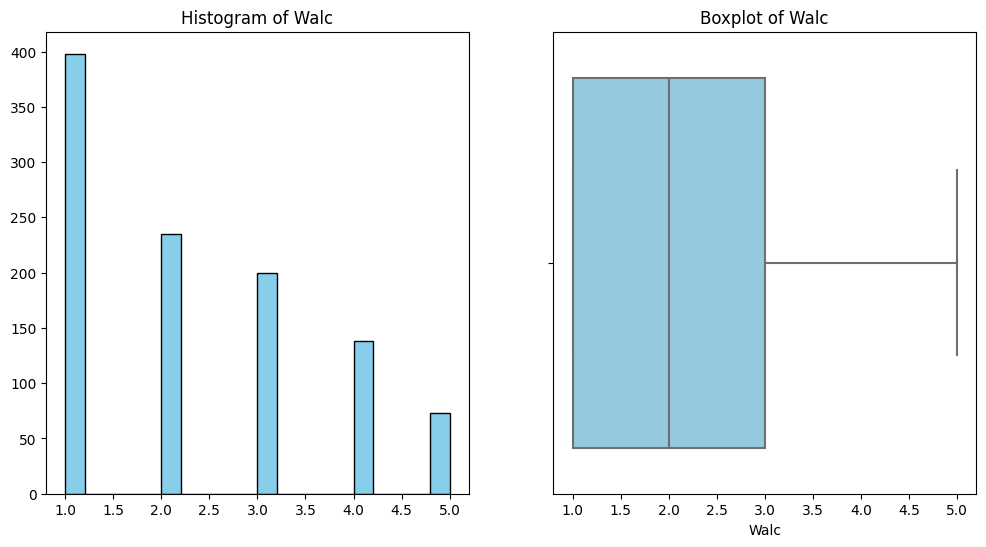

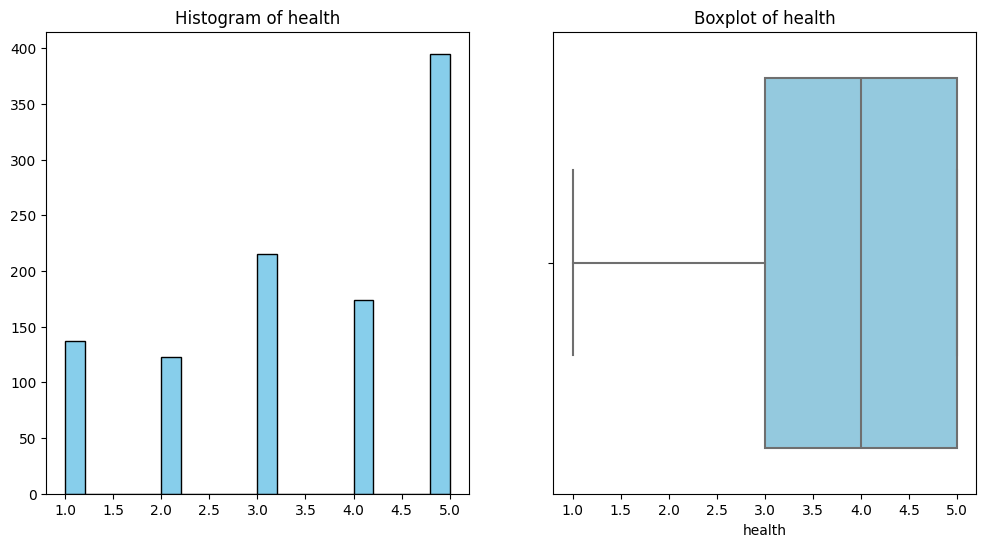

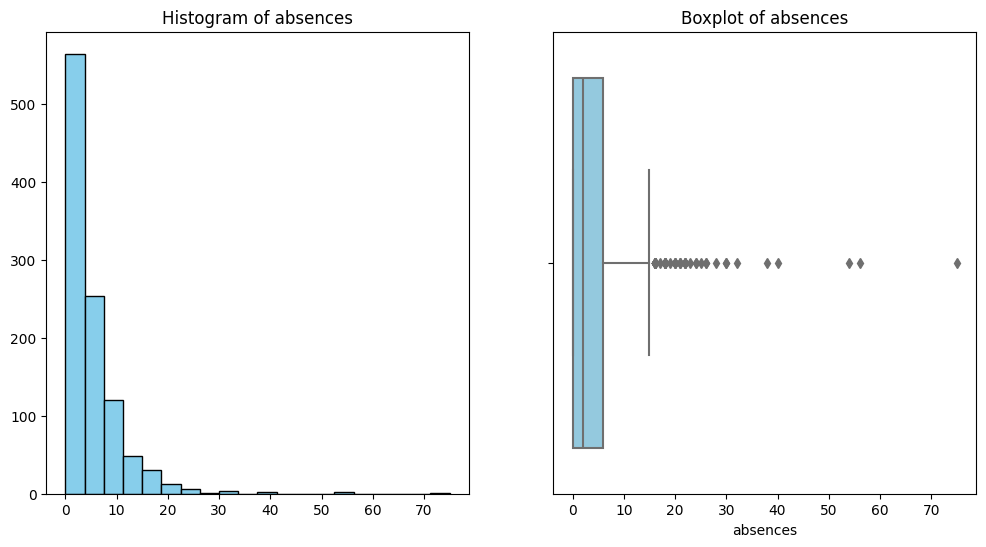

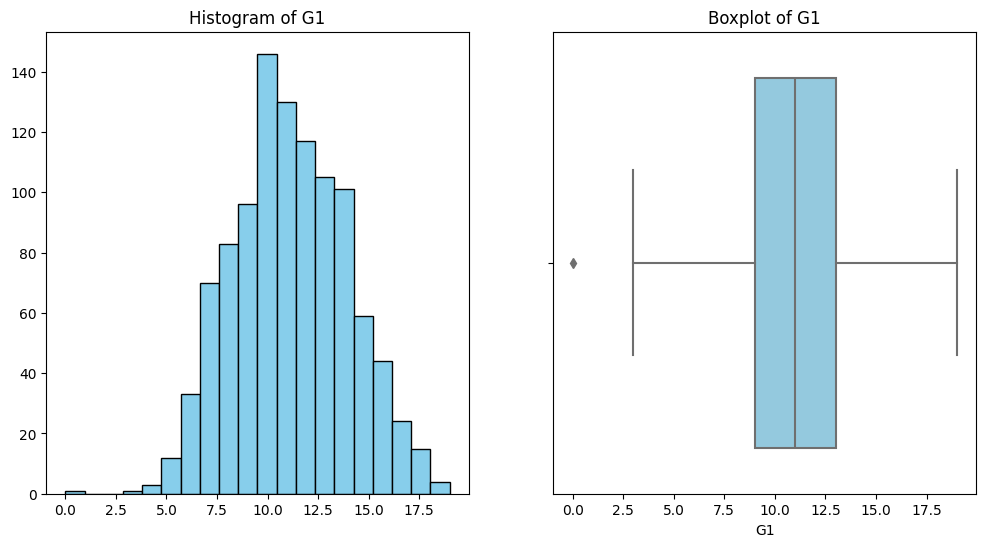

In [6]:
# 모든 int64형 데이터에 대한 반복문
for column in df.select_dtypes(include='int64').columns:
    # 히스토그램 그리기
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')

    # 박스 플롯 그리기
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Boxplot of {column}')

    plt.show()

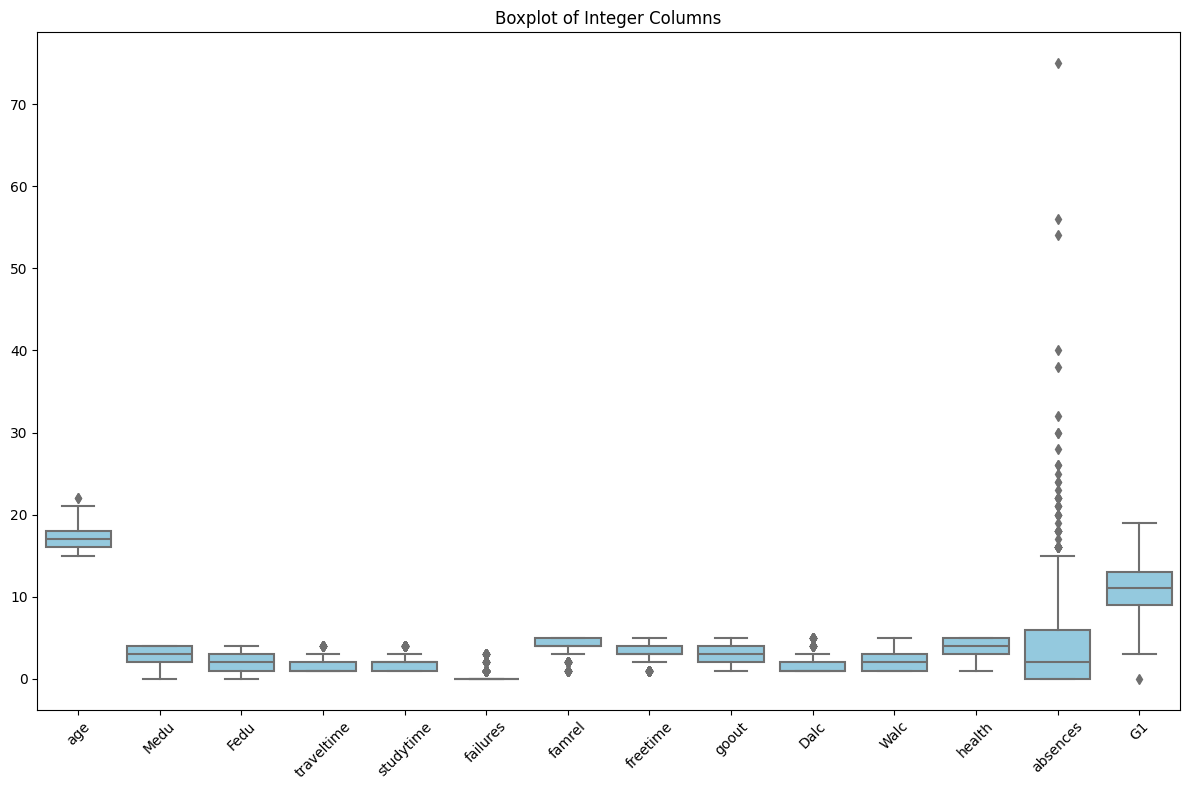

In [7]:
# 박스 플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include='int64'), color='skyblue')
plt.title('Boxplot of Integer Columns')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()

2. 범주형 변경

In [8]:
# 데이터프레임을 복사하여 사용
df1 = df.copy()

# 'yes'를 True로, 'no'를 False로 변환
columns_to_convert = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for column in columns_to_convert:
    df1[column] = df1[column].replace({'yes': True, 'no': False})
    
# 각 열에 대한 범주형 값을 숫자로 매핑하는 딕셔너리 정의
address_map = {'U': 0, 'R': 1}

# 각 열에 대해 map 함수를 사용하여 범주형 값을 숫자로 변환
df1['address'] = df1['address'].map(address_map)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
g1X = df1[['Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'traveltime', 'studytime',
       'failures','higher',
       'famrel','freetime', 'goout',
       'health', 'absences']]
g1y = df1['G1_X']

In [11]:
# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 각 열에 대해 라벨 인코딩을 수행합니다.
for col in g1X.columns:
    if g1X[col].dtype == 'object':  # 문자열 형식인 열만 처리합니다.
        g1X[col] = label_encoder.fit_transform(g1X[col])

C:\Users\user\AppData\Local\Temp\ipykernel_8548\3026610596.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g1X[col] = label_encoder.fit_transform(g1X[col])
C:\Users\user\AppData\Local\Temp\ipykernel_8548\3026610596.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g1X[col] = label_encoder.fit_transform(g1X[col])
C:\Users\user\AppData\Local\Temp\ipykernel_8548\3026610596.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [12]:
columns = g1X.columns

for col in columns:
    print(col, g1X[col].unique())

Medu [4 1 3 2 0]
Fedu [4 1 2 3 0]
Mjob [0 1 2 3 4]
Fjob [4 2 3 1 0]
reason [0 2 1 3]
traveltime [2 1 3 4]
studytime [2 3 1 4]
failures [0 3 1 2]
higher [ True False]
famrel [4 5 3 1 2]
freetime [3 2 4 1 5]
goout [4 3 2 1 5]
health [3 5 1 2 4]
absences [ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 11  5 13  3
 25 54 20 56 28 75 19 38 40 23 17]


### 모델링
1. 데이터 분할

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# 데이터 분할하기
# Train, Test 데이터 분리

g1X_train, g1X_test, g1y_train, g1y_test = train_test_split(g1X, g1y, test_size=0.2, random_state=42)

2. 모델링

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

from lightgbm import LGBMRegressor
from imblearn.over_sampling import SMOTE

import numpy as np

In [16]:
# 선형 회귀 모델을 초기화하고 훈련합니다.
model = LinearRegression()
model.fit(g1X_train, g1y_train)

# 테스트 세트를 사용하여 예측을 수행합니다.
y_pred = model.predict(g1X_test)


# 예측 결과를 평가
mse = mean_squared_error(g1y_test, y_pred)
print("LinearRegression 평균제곱오차 (RMSE):", np.sqrt(mse))


LinearRegression 평균제곱오차 (RMSE): 2.610678224365326


In [17]:
# Random Forest 회귀 모델 생성
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 훈련
model_rf.fit(g1X_train, g1y_train)

# 테스트 데이터로 예측
y_pred_rf = model_rf.predict(g1X_test)

# 평가: 평균 제곱 오차(MSE)
mse_rf = mean_squared_error(g1y_test, y_pred_rf)
print("Random Forest 모델의 평균 제곱 오차(RMSE):", np.sqrt(mse_rf))

Random Forest 모델의 평균 제곱 오차(RMSE): 2.3996861560609064


In [18]:
# 모델 재훈련
lg_model = LGBMRegressor(random_state=0, verbose=-1)
lg_model.fit(g1X_train, g1y_train)

# 재예측
lg_y_pred = lg_model.predict(g1X_test)

# 평가: 평균 제곱 오차(MSE)
mse_lg = mean_squared_error(g1y_test, lg_y_pred)

print("LightGBM 모델의 평균 제곱 오차(RMSE):", np.sqrt(mse_lg))

LightGBM 모델의 평균 제곱 오차(RMSE): 2.4564731903232038


address 별 예측 모델 {'U': 0, 'R': 1}

In [19]:
g1f = df1[['Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'traveltime', 'studytime',
       'failures','higher',
       'famrel','freetime', 'goout',
       'health', 'absences', 'address', 'G1_X']]

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 각 열에 대해 라벨 인코딩을 수행합니다.
for col in g1f.columns:
    if g1f[col].dtype == 'object':  # 문자열 형식인 열만 처리합니다.
        g1f[col] = label_encoder.fit_transform(g1f[col])

C:\Users\user\AppData\Local\Temp\ipykernel_8548\1522544987.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g1f[col] = label_encoder.fit_transform(g1f[col])
C:\Users\user\AppData\Local\Temp\ipykernel_8548\1522544987.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g1f[col] = label_encoder.fit_transform(g1f[col])
C:\Users\user\AppData\Local\Temp\ipykernel_8548\1522544987.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [20]:
address_dfs = {}

for address in [0,1]:

    address_df = address_dfs[f'address_{address}_df'] = g1f[g1f['address'] == address]
    
    X2= address_df[['Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'traveltime', 'studytime',
       'failures','higher',
       'famrel','freetime', 'goout',
       'health', 'absences']]
    y = address_df['G1_X']

    #데이터 분리
    X_train2, X_test2, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state=42)
    
    print(f'\n모델: address_{address}_df')
    
    model = LinearRegression()
    model.fit(X_train2, y_train)

    # 테스트 세트를 사용하여 예측을 수행합니다.
    y_pred = model.predict(X_test2)

    # 예측 결과를 평가
    mse = mean_squared_error(y_test, y_pred, squared=False)
    print("LinearRegression 평균제곱오차 RMSE:", mse)
    
    # lgbm 모델 학습
    lgb_model = LGBMRegressor(random_state=42, verbosity=-1)
    lgb_model.fit(X_train2, y_train)
    lgb_test_pred = lgb_model.predict(X_test2)

    # RMSE 계산
    lgb_test_rmse = mean_squared_error(y_test, lgb_test_pred, squared=False)

    print("LightGBM 모델의 RMSE:", lgb_test_rmse)
    
        # 랜덤 포레스트 모델 훈련 및 평가
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train2, y_train)
    rf_test_pred = rf_model.predict(X_test2)
    rf_test_rmse = mean_squared_error(y_test, rf_test_pred, squared=False)
    print("RandomForest 모델의 RMSE:", rf_test_rmse)



모델: address_0_df
LinearRegression 평균제곱오차 RMSE: 2.5980437495018114
LightGBM 모델의 RMSE: 2.5726529519272345


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

RandomForest 모델의 RMSE: 2.5896533871237097

모델: address_1_df
LinearRegression 평균제곱오차 RMSE: 2.545353578502851
LightGBM 모델의 RMSE: 2.4540150360278004
RandomForest 모델의 RMSE: 2.4014919979008855


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3. scaler

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [22]:
# 정규화
scaler = StandardScaler()

mm_X_train = scaler.fit_transform(g1X_train)
mm_X_test = scaler.transform(g1X_test)

# 모델 재훈련
#lgbm
mm_model = LGBMRegressor(random_state=0, verbose=-1)
mm_model.fit(mm_X_train, g1y_train)
# 랜덤포레스트
model_rf.fit(mm_X_train, g1y_train)

#재예측
mm_y_pred = mm_model.predict(mm_X_test)
mrf_y_pred = model_rf.predict(mm_X_test)

#평가: 평균 제곱 오차(MSE)
mse_mm = mean_squared_error(g1y_test, mm_y_pred)
mse_mrf = mean_squared_error(g1y_test, mrf_y_pred)


#MinMaxScaler
n_scaler = MinMaxScaler()

nn_X_train = n_scaler.fit_transform(g1X_train)
nn_X_test = n_scaler.transform(g1X_test)

# 모델 재훈련
nn_model = LGBMRegressor(random_state=0, verdose=-1)
nn_model.fit(nn_X_train, g1y_train)

# 랜덤포레스트
model_rf.fit(nn_X_train, g1y_train)

#재예측
nn_y_pred = nn_model.predict(nn_X_test)
nrf_y_pred = model_rf.predict(nn_X_test)


# 평가: 평균 제곱 오차(MSE)
mse_nn = mean_squared_error(g1y_test, nn_y_pred)
mse_nrf = mean_squared_error(g1y_test, nrf_y_pred)


[LightGBM] [Warning] Unknown parameter: verdose
[LightGBM] [Warning] Unknown parameter: verdose
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 83
[LightGBM] [Info] Number of data points in the train set: 835, number of used features: 14
[LightGBM] [Info] Start training from score 0.030707
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [23]:
print("Standard 후 LightGBM 모델의 평균 제곱 오차(RMSE):", np.sqrt(mse_mm))
print("MinMax 후 LightGBM 모델의 평균 제곱 오차(RMSE):", np.sqrt(mse_nn))

print("Standard 후 랜덤포레스트 모델의 평균 제곱 오차(RMSE):", np.sqrt(mse_mrf))
print("MinMax 후 랜덤포레스트 모델의 평균 제곱 오차(RMSE):", np.sqrt(mse_nrf))

Standard 후 LightGBM 모델의 평균 제곱 오차(RMSE): 2.4473294409780837
MinMax 후 LightGBM 모델의 평균 제곱 오차(RMSE): 2.4564731903232038
Standard 후 랜덤포레스트 모델의 평균 제곱 오차(RMSE): 2.3956092707870864
MinMax 후 랜덤포레스트 모델의 평균 제곱 오차(RMSE): 2.394113786818707


In [24]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

model = RandomForestRegressor()
#model = LGBMRegressor()

# 그리드 서치를 사용하여 모델 최적화
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(mm_X_train, g1y_train)

# 최적 모델 및 하이퍼파라미터 출력
print("최적 모델:", grid_search.best_estimator_)
print("최적 하이퍼파라미터:", grid_search.best_params_)

최적 모델: RandomForestRegressor(min_samples_split=10, n_estimators=200)
최적 하이퍼파라미터: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


In [25]:
# 최적의 하이퍼파라미터로 랜덤 포레스트 모델 생성
b_model = grid_search.best_estimator_

# 모델 학습
b_model.fit(mm_X_train, g1y_train)

# 테스트 데이터에 대한 예측 수행
predictions = b_model.predict(mm_X_test)

# 평균 제곱 오차 계산
mse = mean_squared_error(g1y_test, predictions)

# RMSE 계산
rmse = np.sqrt(mse)
print("평균 제곱 오차(RMSE):", rmse)

평균 제곱 오차(RMSE): 2.409962222309037


### 시각화

In [26]:
#글꼴 불러오기
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') 

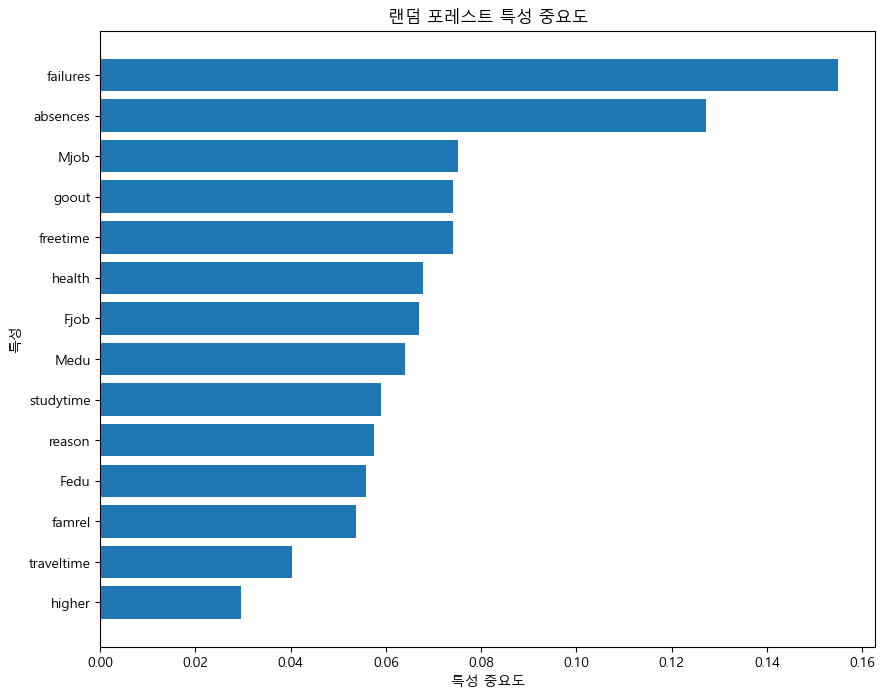

In [27]:
feature_importance = model_rf.feature_importances_

# 중요도를 기준으로 특성을 정렬
sorted_idx = feature_importance.argsort()

# 중요도가 높은 특성 순으로 이름과 중요도 추출
sorted_feature_names = g1X.columns[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# 막대 그래프로 특성 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_importance)), sorted_importance, align='center')
plt.yticks(range(len(sorted_importance)), sorted_feature_names)
plt.xlabel('특성 중요도')
plt.ylabel('특성')
plt.title('랜덤 포레스트 특성 중요도')
plt.show()


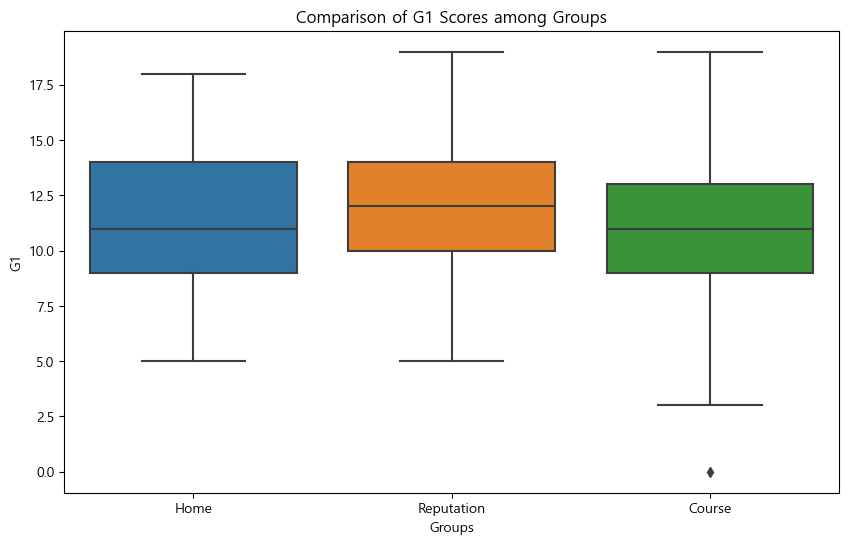

In [28]:
# 데이터프레임에서 각 그룹 추출
home = df1[df1['reason'] == 'home']['G1']
reputation = df1[df1['reason'] == 'reputation']['G1']
course = df1[df1['reason'] == 'course']['G1']

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(data=[home, reputation, course])
plt.xlabel('Groups')
plt.ylabel('G1')
plt.title('Comparison of G1 Scores among Groups')
plt.xticks(ticks=[0, 1, 2], labels=['Home', 'Reputation', 'Course'])
plt.show()

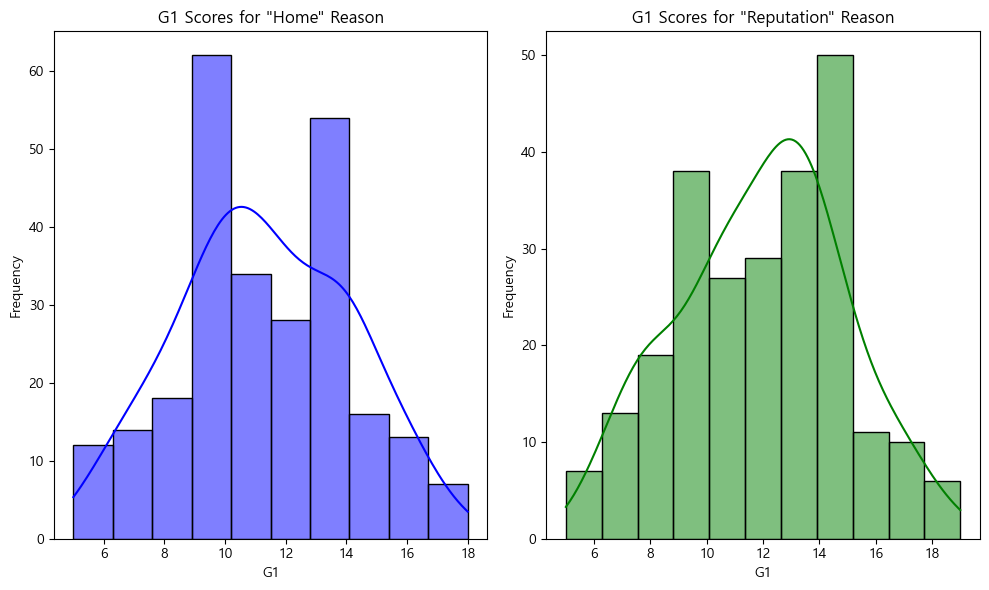

In [29]:
# 'reason'이 'home'인 경우와 'reputation'인 경우에 대해 데이터 추출
home_data = df1[df1['reason'] == 'home']['G1']
reputation_data = df1[df1['reason'] == 'reputation']['G1']

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 'reason'이 'home'인 경우 그래프
plt.subplot(1, 2, 1)
sns.histplot(home_data, kde=True, color='blue')
plt.title('G1 Scores for "Home" Reason')
plt.xlabel('G1')
plt.ylabel('Frequency')

# 'reason'이 'reputation'인 경우 그래프
plt.subplot(1, 2, 2)
sns.histplot(reputation_data, kde=True, color='green')
plt.title('G1 Scores for "Reputation" Reason')
plt.xlabel('G1')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [30]:
# 'Medu' 열의 값에 따라 데이터 그룹화
medu_groups = df1.groupby('Medu')

# 각 그룹에서 'reason'이 'home'인 경우의 개수 계산
home_counts_by_medu = medu_groups.apply(lambda x: (x['reason'] == 'home').sum())

# 각 그룹에서 전체 데이터 개수 계산
total_counts_by_medu = medu_groups.size()

# 'reason'이 'home'인 비율 계산
home_ratio_by_medu = home_counts_by_medu / total_counts_by_medu

# 결과 출력
result_df = pd.DataFrame({'Medu': home_ratio_by_medu.index, 'Home Reason Ratio': home_ratio_by_medu.values})
result_df

,Medu,Home Reason Ratio
0,0,0.222222
1,1,0.217822
2,2,0.231834
3,3,0.310924
4,4,0.232026


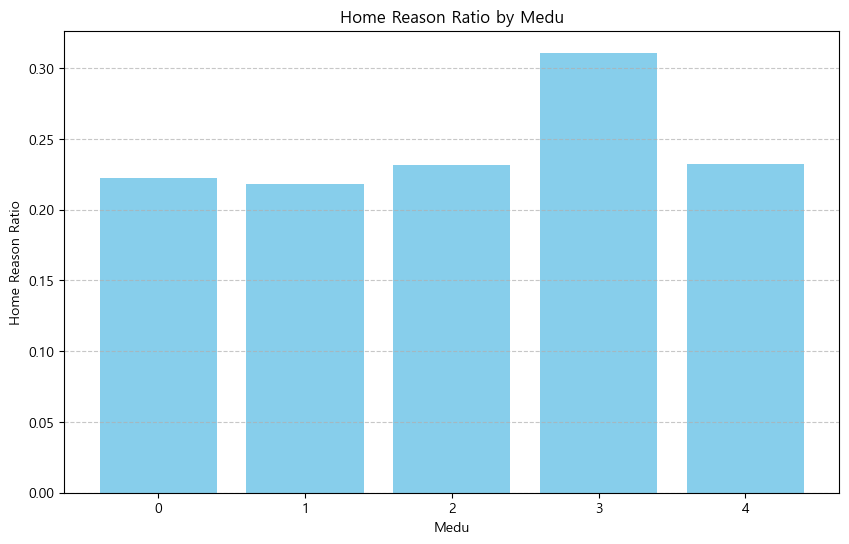

In [31]:
# 시각화
plt.figure(figsize=(10, 6))
plt.bar(home_ratio_by_medu.index, home_ratio_by_medu.values, color='skyblue')
plt.xlabel('Medu')
plt.ylabel('Home Reason Ratio')
plt.title('Home Reason Ratio by Medu')
plt.xticks(home_ratio_by_medu.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


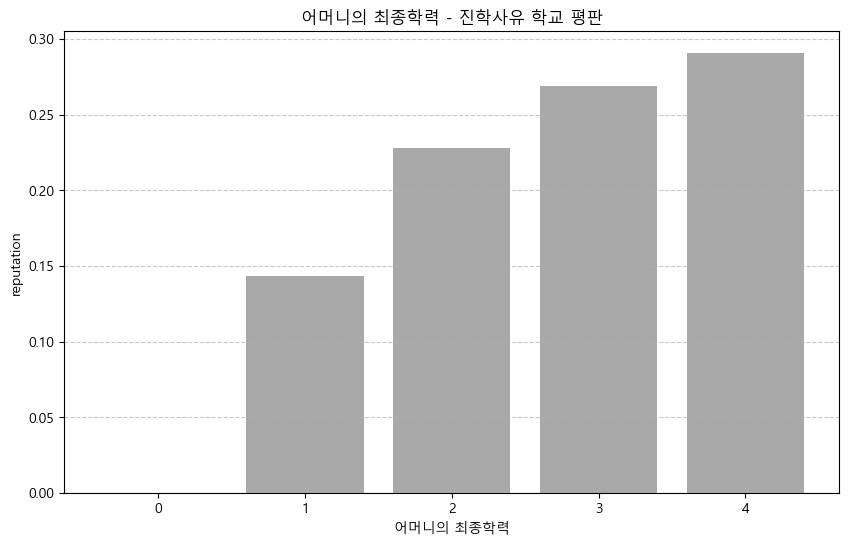

In [32]:
# 'Medu' 열의 값에 따라 데이터 그룹화
medu_groups = df1.groupby('Medu')

# 각 그룹에서 'reason'이 'home'인 경우의 개수 계산
home_counts_by_medu = medu_groups.apply(lambda x: (x['reason'] == 'reputation').sum())

# 각 그룹에서 전체 데이터 개수 계산
total_counts_by_medu = medu_groups.size()

# 'reason'이 'home'인 비율 계산
home_ratio_by_medu = home_counts_by_medu / total_counts_by_medu

# 결과 출력
result_df = pd.DataFrame({'Medu': home_ratio_by_medu.index, 'Home Reason Ratio': home_ratio_by_medu.values})

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(home_ratio_by_medu.index, home_ratio_by_medu.values, color='darkgray')
plt.xlabel('어머니의 최종학력')
plt.ylabel('reputation')
plt.title('어머니의 최종학력 - 진학사유 학교 평판')
plt.xticks(home_ratio_by_medu.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


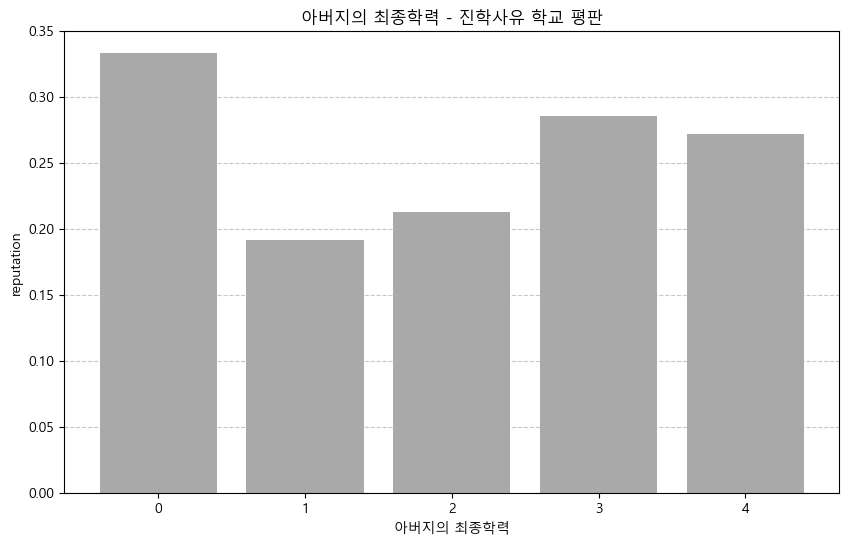

In [33]:
# 'Medu' 열의 값에 따라 데이터 그룹화
medu_groups = df1.groupby('Fedu')

# 각 그룹에서 'reason'이 'home'인 경우의 개수 계산
home_counts_by_medu = medu_groups.apply(lambda x: (x['reason'] == 'reputation').sum())

# 각 그룹에서 전체 데이터 개수 계산
total_counts_by_medu = medu_groups.size()

# 'reason'이 'home'인 비율 계산
home_ratio_by_medu = home_counts_by_medu / total_counts_by_medu

# 결과 출력
result_df = pd.DataFrame({'Medu': home_ratio_by_medu.index, 'Home Reason Ratio': home_ratio_by_medu.values})

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(home_ratio_by_medu.index, home_ratio_by_medu.values, color='darkgray')
plt.xlabel('아버지의 최종학력')
plt.ylabel('reputation')
plt.title('아버지의 최종학력 - 진학사유 학교 평판')
plt.xticks(home_ratio_by_medu.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

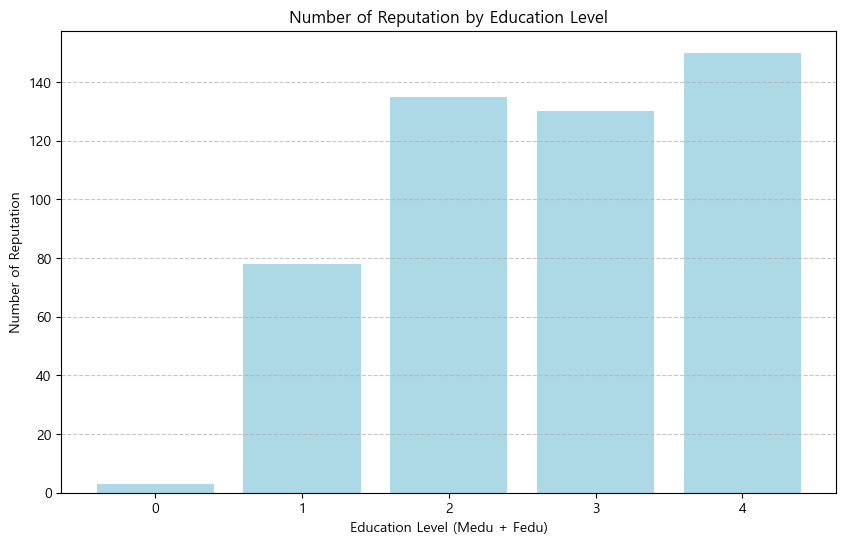

In [34]:
# 'Medu' 값별로 'reputation'인 데이터 수 구하기
reputation_counts_by_medu = df1[df1['reason'] == 'reputation'].groupby('Medu').size()

# 'Fedu' 값별로 'reputation'인 데이터 수 구하기
reputation_counts_by_fedu = df1[df1['reason'] == 'reputation'].groupby('Fedu').size()

# 'Medu'와 'Fedu' 값별로 'reputation' 수 합산하기
reputation_counts_combined = reputation_counts_by_medu.add(reputation_counts_by_fedu, fill_value=0)

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(reputation_counts_combined.index, reputation_counts_combined.values, color='lightblue')
plt.xlabel('Education Level (Medu + Fedu)')
plt.ylabel('Number of Reputation')
plt.title('Number of Reputation by Education Level')
plt.xticks(reputation_counts_combined.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

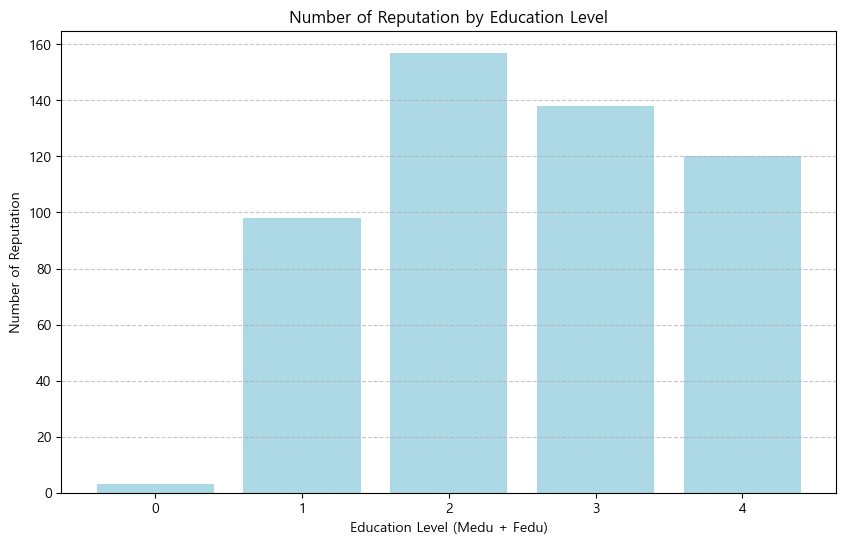

In [35]:
# 'Medu' 값별로 'reputation'인 데이터 수 구하기
reputation_counts_by_medu = df1[df1['reason'] == 'home'].groupby('Medu').size()

# 'Fedu' 값별로 'reputation'인 데이터 수 구하기
reputation_counts_by_fedu = df1[df1['reason'] == 'home'].groupby('Fedu').size()

# 'Medu'와 'Fedu' 값별로 'reputation' 수 합산하기
reputation_counts_combined = reputation_counts_by_medu.add(reputation_counts_by_fedu, fill_value=0)

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(reputation_counts_combined.index, reputation_counts_combined.values, color='lightblue')
plt.xlabel('Education Level (Medu + Fedu)')
plt.ylabel('Number of Reputation')
plt.title('Number of Reputation by Education Level')
plt.xticks(reputation_counts_combined.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()